In [1]:
import json
  
# read json data file
f=open('taxi_requests.json')
data = json.load(f)
f.close()

login_times=data['request_time']

# uncomment next line to see how the data looks like
#display(login_times) 

In [2]:
# convert time string to timestamps
from datetime import datetime, timedelta, timezone
tz = timezone(timedelta(hours=+4), 'UTC+4')
timestamps=[datetime.strptime(login_times[i], '%Y-%m-%d %H:%M:%S').replace(tzinfo=tz).timestamp() for i in range(len(login_times))]
#timestamps

In [3]:
import numpy as np
print(timestamps[:10])

timestamps = np.sort(timestamps)

days = np.array([datetime.utcfromtimestamp(tstamp).day for tstamp in timestamps])
months = np.array([datetime.utcfromtimestamp(tstamp).month for tstamp in timestamps])
years = np.array([datetime.utcfromtimestamp(tstamp).year for tstamp in timestamps])
hours = np.array([datetime.utcfromtimestamp(tstamp).hour for tstamp in timestamps])
minutes = np.array([datetime.utcfromtimestamp(tstamp).minute for tstamp in timestamps])
seconds = np.array([datetime.utcfromtimestamp(tstamp).second for tstamp in timestamps])
weekdays = np.array([datetime.utcfromtimestamp(tstamp).strftime('%A') for tstamp in timestamps])
weekdays_number = np.array([datetime.utcfromtimestamp(tstamp).strftime('%w') for tstamp in timestamps], dtype='int')

datetime(year=years[0], month=months[0], day=days[0], hour=hours[0], minute=minutes[0], second=seconds[0])

[58398.0, 58570.0, 58597.0, 58596.0, 59181.0, 58901.0, 58336.0, 59747.0, 59738.0, 60472.0]


datetime.datetime(1970, 1, 1, 16, 12, 16)

# Written questions

Please search online and read the documentation for strptime() and timestamp() and write down short answers to the following questions:

A- What does the previous cell do? it uses strptime to get timestamps

B- What does the concept of "timestamp" mean? What are its type and unit?

C- Is the variable "timestamps" a list or a numpy array?

D- Which day of week (Sunday, Monday, ...) is 1970-01-01?

E- Which function can convert a timestamp back to datetime?


# Project questions

Explore data, write code, and search online to answer the following questions about the data:

1- How many days are there in the data?

2- Which date was the busiest date (the day with the most requests)? Which date was the second busiest date?

3- Which hour was the busiest hour (the hour with the most requests)?

4- Are there any two requests that happened at the same time?

5- What is the longest gap between two consequent requests?

6- Overall, does the volume of requests increase or decrease over time?

7- Bonus: For each day calculate the average request time for all requests between 6:00 AM and 9:00 AM

8- Bonus: Which day of week is the busiest?

9- Bonus: Calculate the average number of requests for each of the 7*24 hours of the week.

10- Bonus: Which dates other than the standard weekend days were holidays?

## Question 1

In [30]:
all_dates = [datetime(year=years[i], month=months[i], day=days[i]).strftime('%Y-%m-%d') for i in range(len(days))]
print(f'Number of unique days in the dataset = {np.unique(all_dates).size}')

Number of unique days in the dataset = 103


## Question 2

Here is an answer to problem 2. We advise to try to solve this problem before you see the answer below


In [36]:
all_dates = [datetime(year=years[i], month=months[i], day=days[i]).strftime('%Y-%m-%d') for i in range(len(days))]
unique, counts = np.unique(all_dates, return_counts=True)
maxday=np.argmax(counts) 
print("the busiest day is day number ",unique[maxday])
second_maxday = np.argsort(counts)[-2]
print('the second busiest day is data number ', unique[second_maxday])

the busiest day is day number  1970-04-03
the second busiest day is data number  1970-03-14


## Question 3

The busiest hour = 18 with 6607 requests.


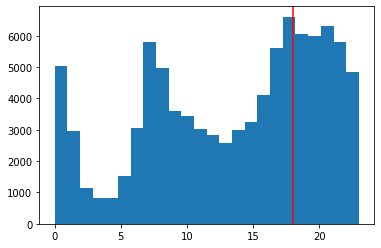

In [57]:
import matplotlib.pyplot as plt

hh, hh_count = np.unique(hours, return_counts=True)
print(f'The busiest hour = {hh[np.argmax(hh_count)]} with {hh_count[np.argmax(hh_count)]} requests.')

plt.hist(hours, bins=24)
plt.axvline(np.argmax(hh_count), c='red')
plt.show()

## Question 4

In [61]:
all_dates = [datetime(year=years[i], month=months[i], day=days[i], hour=hours[i], minute=minutes[i], second=seconds[i]).strftime('%Y-%m-%d %H:%M:%S') for i in range(len(days))]
duplicate_requests, duplication_counts = np.unique(all_dates, return_counts=True)
total_dup_counts = 0
for dup_req, dup_count in zip(duplicate_requests, duplication_counts):
    if dup_count > 1:
        # print(f'Time: {dup_req}\tCounts: {dup_count}')
        # total_dup_counts += dup_count
        total_dup_counts += 1

print(f'Total duplications: {total_dup_counts}')

Total duplications: 1745


## Question 5

In [66]:
timestamps = np.sort(timestamps)
diff_timestamps = np.diff(timestamps)   # timestamps are sorted
max_diff = np.argmax(diff_timestamps)
timestamps[max_diff], timestamps[max_diff+1], diff_timestamps[max_diff]

(644046.0, 649547.0, 5501.0)

## Question 6

[ 7615  6678  7410  7545  9625  9676 10706 12535 10549 10803]


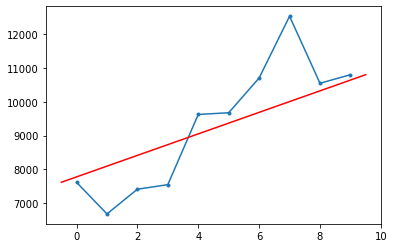

In [10]:
import matplotlib.pyplot as plt
req_nums_in_bin, _ = np.histogram(timestamps, bins=10)
print(req_nums_in_bin)

plt.plot(req_nums_in_bin, marker='.')
plt.plot([-0.5, len(req_nums_in_bin)-0.5], [req_nums_in_bin[0], req_nums_in_bin[-1]], c='red')
plt.show()


## Question 7

In [11]:
req_id = np.arange(0, len(timestamps))
# req_matrix = np.zeros((1, 12, 32, 24))     # year, months, days, hours
req_matrix = np.zeros((len(req_id), 1, 12, 8, 24))     # unique_id, year, months, weekdays, hours
req_matrix[req_id, years-1970, months, weekdays_number, hours] = 1
between_6_9 = req_matrix[:, :, :, :, 6:9]
result = req_matrix.sum(axis=4).sum(axis=0)
result.shape

(1, 12, 8)

## Question 8

In [109]:
all_dates = [datetime(year=years[i], month=months[i], day=days[i], hour=hours[i], minute=minutes[i], second=seconds[i]).strftime('%A') for i in range(len(days))]
dd, dd_count = np.unique(all_dates, return_counts=True)
print(dd[np.argsort(dd_count)][::-1])

['Saturday' 'Friday' 'Sunday' 'Thursday' 'Wednesday' 'Tuesday' 'Monday']


## Question 9

In [12]:
req_id = np.arange(0, len(timestamps))
req_matrix = np.zeros((len(req_id), 1, 12, 8, 24))     # unique_id, year, months, weekdays, hours
req_matrix[req_id, years-1970, months, weekdays_number, hours] = 1
avg_req_days_hours = req_matrix.sum(axis=0).sum(axis=0).sum(axis=0) / (1 * 7)
avg_req_days_hours.shape

(8, 24)

## Question 10

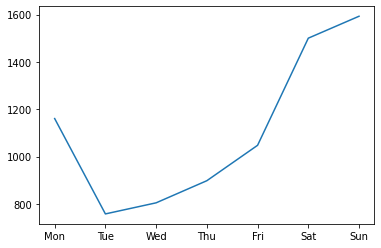

In [162]:
import matplotlib.pyplot as plt

weekdays_avg_req = req_matrix.sum(axis=0).sum(axis=-1)
avg_weekends = weekdays_avg_req[:, :, 3:5].mean()
plt.plot(weekdays_avg_req[:, :, :-1].sum(axis=0).sum(axis=0)/(1*12))
plt.gca().set_xticks(np.arange(0, 7))
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [164]:
avg_weekends

972.9166666666666

In [177]:
all_weekends = [datetime(year=years[i], month=months[i], day=days[i]).strftime('%w') for i in range(len(days)) if weekdays[i] in ['Thursday', 'Friday']]
all_weekend_days = np.unique(
    [datetime(year=years[i], month=months[i], day=days[i]).strftime('%Y-%m-%d') for i in range(len(days)) if weekdays[i] in ['Thursday', 'Friday']]
)

all_nonweekends = [datetime(year=years[i], month=months[i], day=days[i]).strftime('%Y-%m-%d') for i in range(len(days)) if weekdays[i] not in ['Thursday', 'Friday']]
_, mean_req_weekends = np.unique(all_weekends, return_counts=True)
mean_req_weekends = mean_req_weekends.sum() / len(all_weekend_days)
mean_req_weekends
unique, counts = np.unique(all_nonweekends, return_counts=True)
delta = 50
unique[np.abs(counts - avg_weekends) < delta]

array(['1970-01-10', '1970-01-24', '1970-02-08', '1970-03-01',
       '1970-04-12'], dtype='<U10')